In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_excel('/content/APDDataset.xlsx')
print(df.head())

   Unnamed: 0  Gender_M   Age       TC     P     L    E  ESRh   ESRo    Hb  \
0           0         0   NaN   9800.0  56.0  40.0  4.0  16.0   30.0  10.8   
1           1         1   NaN  10500.0  54.0  40.0  6.0   9.0   15.0  11.0   
2           2         0  42.0   7500.0  66.0  28.0  6.0  22.0   40.0   7.0   
3           3         0  33.0   7100.0  48.0  44.0  8.0  13.0   25.0  11.0   
4           4         0   NaN   9900.0  77.0  17.0  6.0  70.0  130.0  10.5   

   ...   MCH  MCHC     ASO     RA    CRP   RBS  Urea  Creatinine  Calcium  \
0  ...   NaN   NaN  121.00  11.97   7.37   NaN   NaN         NaN      NaN   
1  ...  25.0   NaN   88.00  10.00   1.50   NaN   NaN         0.9      NaN   
2  ...   NaN   NaN  151.00  10.00    NaN   NaN   NaN         NaN      NaN   
3  ...   NaN   NaN   66.12  10.00    NaN   NaN   NaN         NaN      NaN   
4  ...  27.0  30.0   90.00  10.00  92.65  96.0  22.0         0.9      8.6   

   Uric_Acid  
0        6.8  
1        NaN  
2        5.9  
3       

In [4]:
df = df.fillna(df.mean())

In [5]:
print(df.shape)

(102, 25)


In [6]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [7]:
X = df.drop('RA', axis=1)
y = (df['RA'] > 10).astype(int)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
print(X_train.shape, X_test.shape)

(81, 24) (21, 24)


In [11]:
model = Sequential()

In [12]:
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.3375 - loss: 0.7745 - val_accuracy: 0.2353 - val_loss: 0.7209
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4187 - loss: 0.7257 - val_accuracy: 0.4118 - val_loss: 0.7045
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5437 - loss: 0.6672 - val_accuracy: 0.5882 - val_loss: 0.6880
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6125 - loss: 0.6715 - val_accuracy: 0.7059 - val_loss: 0.6730
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5396 - loss: 0.6976 - val_accuracy: 0.7647 - val_loss: 0.6615
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6479 - loss: 0.6399 - val_accuracy: 0.7647 - val_loss: 0.6480
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6708 - loss: 0.6656 - val_accuracy: 0.7647 - val_loss: 0.6356
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6792 - loss: 0.6327 - val_accuracy: 0.7647 - val_loss: 0.6219

In [14]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Training Accuracy: 0.7812
Final Validation Accuracy: 0.7059


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


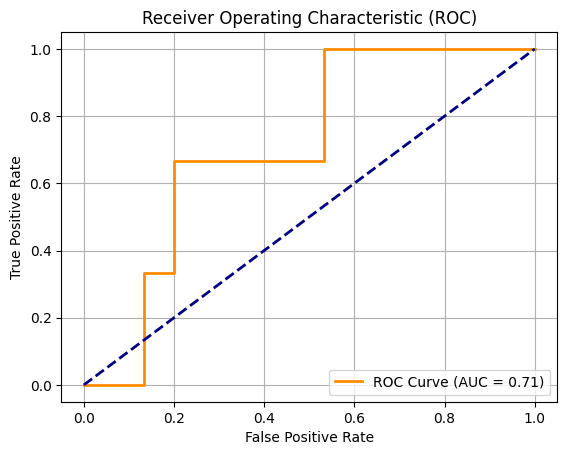

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict(X_test).ravel()  # Flatten to 1D array if needed

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


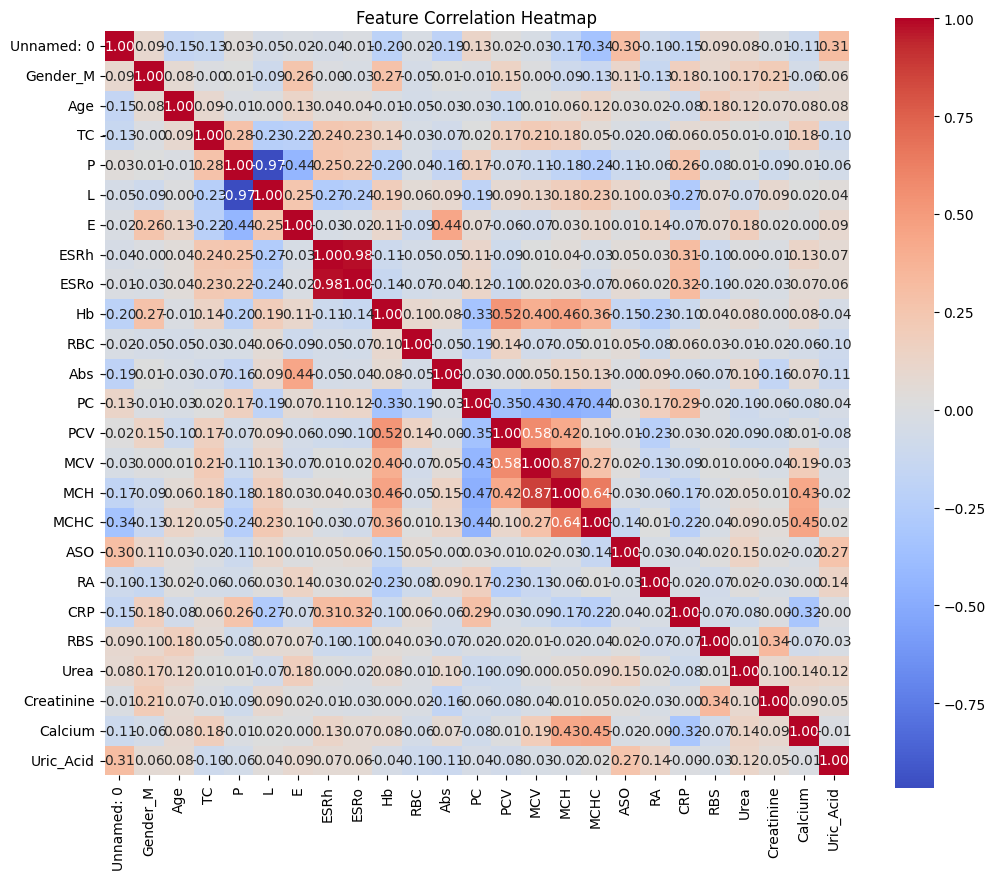

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


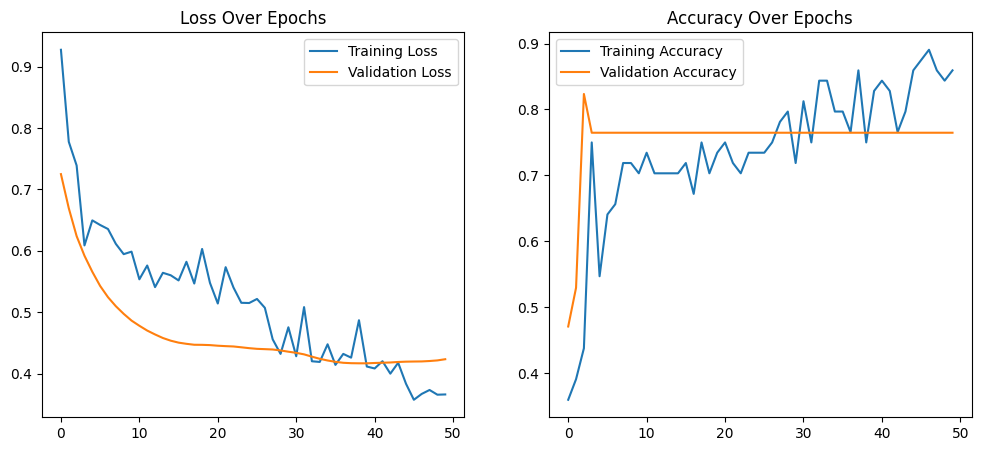

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.00      0.00      0.00         6

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21

ROC-AUC Score: 0.4555555555555556


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


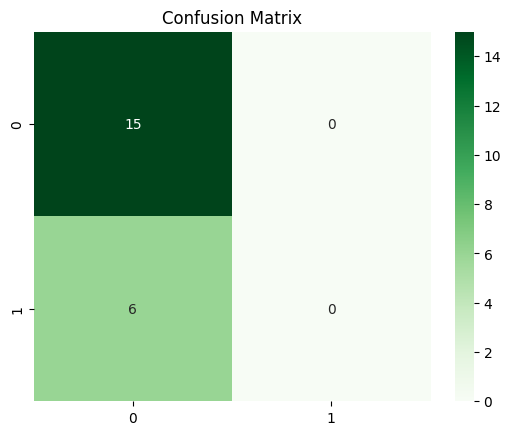

In [ ]:
y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_probs))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()


In [21]:

def get_user_input():
    print("Please provide the following values:")
    Gender_M = float(input("Gender: "))
    Age = float(input("Age: "))
    TC = float(input("TC: "))
    P = float(input("P: "))
    E = float(input("E: "))
    ESRh = float(input("ESRh: "))
    ESRo = float(input("ESRo: "))
    Hb = float(input("Hb: "))
    RBC = float(input("RBC: "))
    CRP = float(input("CRP: "))
    PC = float(input("PC: "))

    user_input = np.array([Gender_M, Age, TC, P, E, ESRh, ESRo, Hb, RBC, CRP, PC, 0, 0, 0 , 0 , 0 , 0, 0, 0, 0 , 0 , 0,0,0]).reshape(1, -1)

    user_input_scaled = scaler.transform(user_input)

    prediction = model.predict(user_input_scaled)

    print(f"Prediction: {'RA positive' if prediction[0] == 1 else 'RA negative'}")

get_user_input()


Please provide the following values:
Gender: 0
Age: 28
TC: 9800
P: 56
E: 5
ESRh: 16
ESRo: 30
Hb: 10.7
RBC: 4
CRP: 7.3
PC: 2.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: RA negative


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
